## Fashion Recommendation Project – Exploratory Data Analysis (EDA)
### This notebook performs EDA on the processed styles data (`Final_Styles.csv`).
#### It focuses on:
#### - Dataset overview (shape, columns, types)
#### - Missing values
#### - Distributions of numeric features (price, discounts, ratings, etc.)
#### - Categorical feature exploration (gender, masterCategory, subCategory, articleType, baseColour, season, usage)
#### - A few simple relationships (e.g., price vs. discount, category vs. price)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

## 1. Load Data

In [ ]:
data_path = "Styles_Corrected_One.csv"

df = pd.read_csv(data_path)
print("Shape of dataset:", df.shape)

Shape of dataset: (88892, 63)


In [4]:
# Show a random sample of rows to get a feel for the data
df.sample(5, random_state=42)

,id,price,discountedPrice,styleType,productTypeId,articleNumber,productDisplayName,variantName,myntraRating,catalogAddDate,...,description_text,articleAttr_Fit,articleAttr_Sleeve_Length,articleAttr_Neck,articleAttr_Fabric,articleAttr_Occasion,articleAttr_Fabric_2,articleAttr_Type,articleAttr_Material,displayCat_primary
52595,19369,2295.0,2295.0,P,288,RTS5874 Blue,Redtape Men Stone Wall Blue Casual Shoes,Stone Wall,0,1471692816,...,Cut a dash with these casual shoes for the cos...,NaN,NaN,NaN,NaN,NaN,NaN,Driving Shoes,NaN,Footwear
86045,6671,3200.0,3200.0,P,288,386117-104,Nike Men's Backboard White Black Shoe,NIKE BACKBOARD SL,1,1461658417,...,Get ready to move in style with these Backboar...,NaN,NaN,NaN,NaN,NaN,NaN,Driving Shoes,NaN,Footwear
6091,17154,3999.0,3999.0,P,292,USJK0033-NAVY-17154,U.S. Polo Assn. Men Solid Navy Blue Jacket,FS POLY JKT WITH RIB HEM,0,1452251737,...,Composition Navy jacket made of 100% polyest...,NaN,Long Sleeves,NaN,Polyester,NaN,NaN,NaN,NaN,Casual Wear
60185,28343,1950.0,1755.0,P,366,S1520-C2 Metalic,Idee Men Metallic Sunglasses,Casual,0,1459416526,...,"High on style, this pair of sunglasses from i ...",NaN,NaN,NaN,NaN,NaN,NaN,Other Sunglasses,NaN,Accessories
37054,55408,960.0,960.0,P,467,4244-32,Revlon ColorStay Overtime Faithful Fawn Lip Co...,REV CST OT Faithful Fawn 32,0,1454675739,...,One end smoothes on advanced ColorStay liquid ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Basic Dataset Overview

In [25]:
print("---Data Types---")
print(df.dtypes)

print("\n--- First 10 Columns ---")
print(df.columns[:10].tolist())

print("\n--- All Columns ---")
print(df.columns.tolist())

---Data Types---
id                        int64
price                   float64
discountedPrice         float64
styleType                object
productTypeId             int64
                         ...   
articleAttr_Fabric_2     object
articleAttr_Type         object
articleAttr_Material     object
displayCat_primary       object
catalog_year_month       object
Length: 64, dtype: object

--- First 10 Columns ---
['id', 'price', 'discountedPrice', 'styleType', 'productTypeId', 'articleNumber', 'productDisplayName', 'variantName', 'myntraRating', 'catalogAddDate']

--- All Columns ---
['id', 'price', 'discountedPrice', 'styleType', 'productTypeId', 'articleNumber', 'productDisplayName', 'variantName', 'myntraRating', 'catalogAddDate', 'brandName', 'ageGroup', 'gender', 'baseColour', 'colour1', 'colour2', 'fashionType', 'season', 'year', 'usage', 'vat', 'displayCategories', 'weight', 'navigationId', 'landingPageUrl', 'isEMIEnabled', 'masterCategory', 'subCategory', 'articleType', 'di

In [6]:
print("\n--- Summary Statistics (Numerical Columns) ---")
display(df.describe().T)


--- Summary Statistics (Numerical Columns) ---


,count,mean,std,min,25%,50%,75%,max
id,88892.0,2.969263e+04,1.704814e+04,1.163000e+03,1.477000e+04,2.860950e+04,4.467900e+04,6.000000e+04
price,88892.0,1.690563e+03,1.715866e+03,0.000000e+00,6.490000e+02,1.199000e+03,1.999000e+03,2.895000e+04
discountedPrice,88892.0,1.614706e+03,1.704843e+03,0.000000e+00,5.900000e+02,1.099000e+03,1.995000e+03,2.895000e+04
productTypeId,88892.0,3.375465e+02,8.606765e+01,2.000000e+00,2.890000e+02,3.230000e+02,3.670000e+02,6.350000e+02
myntraRating,88892.0,4.691986e-01,5.879343e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01
catalogAddDate,88892.0,1.439693e+09,3.749541e+07,1.298373e+09,1.434454e+09,1.452252e+09,1.461658e+09,1.478576e+09
year,88890.0,2.012806e+03,2.126389e+00,2.007000e+03,2.011000e+03,2.012000e+03,2.015000e+03,2.019000e+03
vat,88892.0,9.747491e+00,4.581912e+00,0.000000e+00,5.500000e+00,5.500000e+00,1.450000e+01,1.450000e+01
weight,88892.0,4.274850e-03,6.381395e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+02
navigationId,88892.0,3.743552e+02,5.619920e+02,0.000000e+00,0.000000e+00,0.000000e+00,8.670000e+02,1.632000e+03


## 3. Missing Values Analysis

In [7]:
# Percentage of missing values per column
missing_pct = df.isna().mean().sort_values(ascending=False) * 100
missing_pct_df = missing_pct.reset_index()
missing_pct_df.columns = ["column", "missing_percent"]

print("Columns with any missing values (top 20):")
display(missing_pct_df[missing_pct_df["missing_percent"] > 0].head(20))

Columns with any missing values (top 20):


,column,missing_percent
0,articleAttr_Fabric_2,96.890609
1,colour2,95.016424
2,articleAttr_Material,88.502902
3,articleAttr_Neck,78.981236
4,articleAttr_Fit,77.307294
5,articleAttr_Type,77.219547
6,discount_percent,77.194798
7,discount_amount,77.194798
8,articleAttr_Occasion,75.246366
9,colour1,73.349683


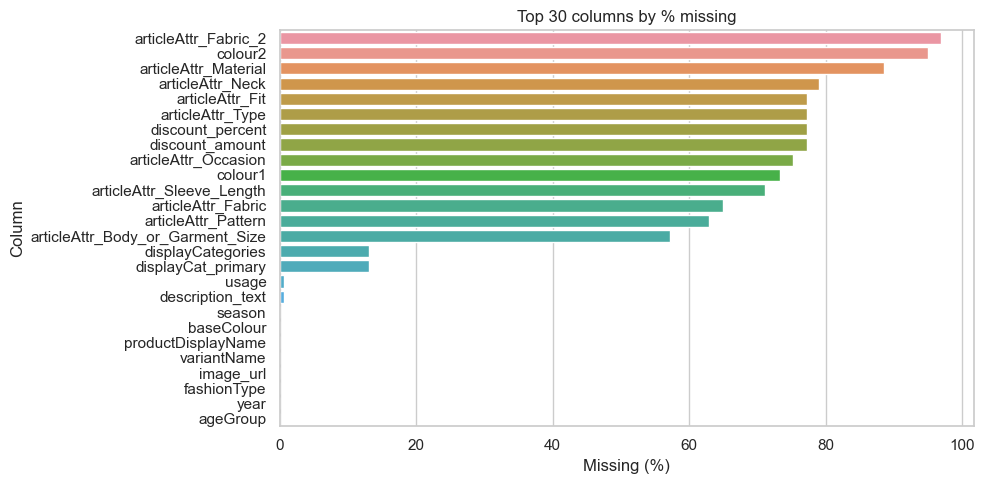

In [8]:
# Plot missing value percentages for columns with non-zero missingness (top 30)
top_n = 30
cols_with_missing = missing_pct[missing_pct > 0].head(top_n)

plt.figure()
sns.barplot(
    x="missing_percent",
    y="column",
    data=missing_pct_df[missing_pct_df["column"].isin(cols_with_missing.index)].sort_values("missing_percent", ascending=False)
)
plt.title(f"Top {top_n} columns by % missing")
plt.xlabel("Missing (%)")
plt.ylabel("Column")
plt.tight_layout()
plt.show()

## 4. Key Numeric Features

In [9]:
# We'll focus on:
# - price
# - discountedPrice
# - effective_price
# - myntraRating
# - total_inventoryCount
# - num_style_options
# - num_crosslinks

numeric_cols = [
    "price",
    "discountedPrice",
    "effective_price",
    "myntraRating",
    "total_inventoryCount",
    "num_style_options",
    "num_crosslinks",
]

numeric_cols = [c for c in numeric_cols if c in df.columns]
print("Numeric columns used for EDA:", numeric_cols)

Numeric columns used for EDA: ['price', 'discountedPrice', 'effective_price', 'myntraRating', 'total_inventoryCount', 'num_style_options', 'num_crosslinks']


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


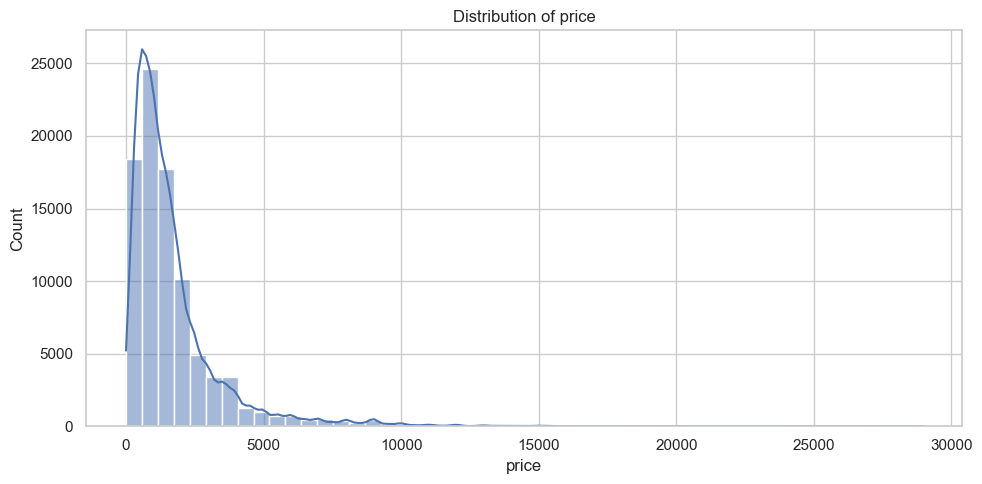

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


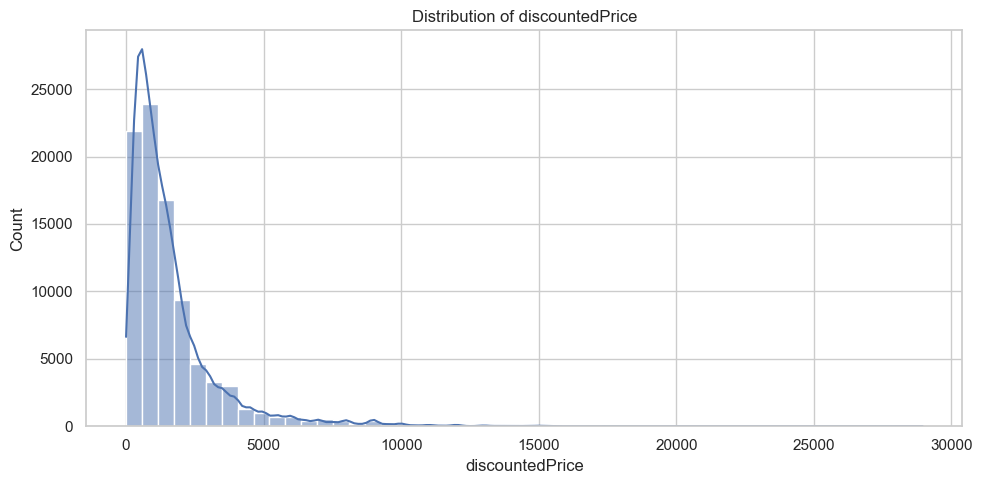

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


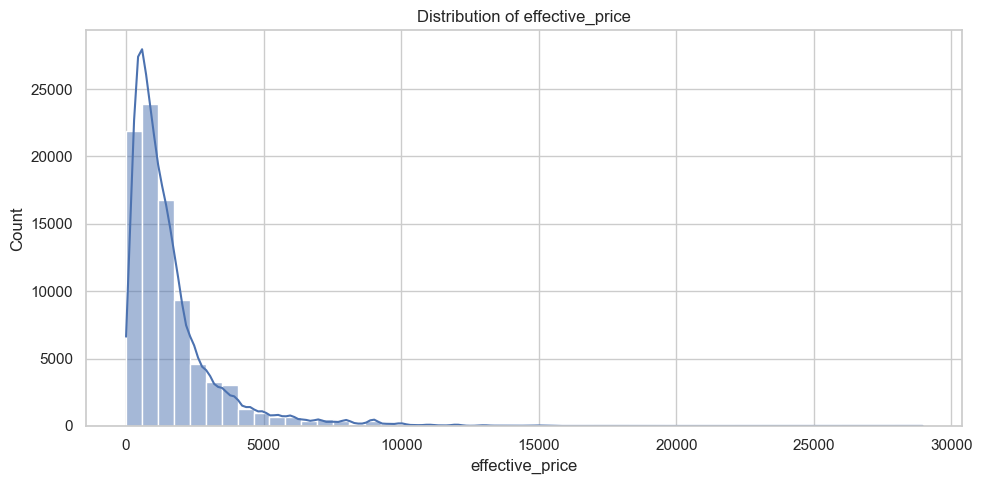

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


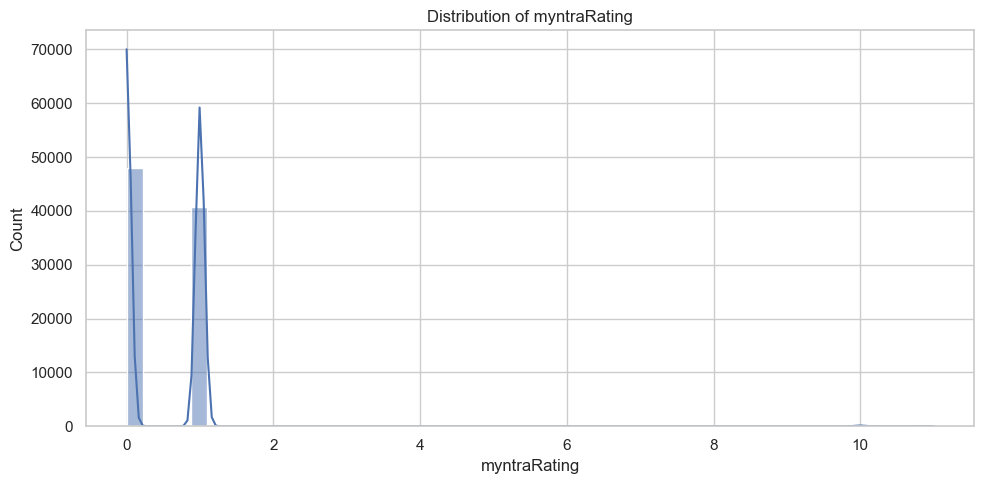

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


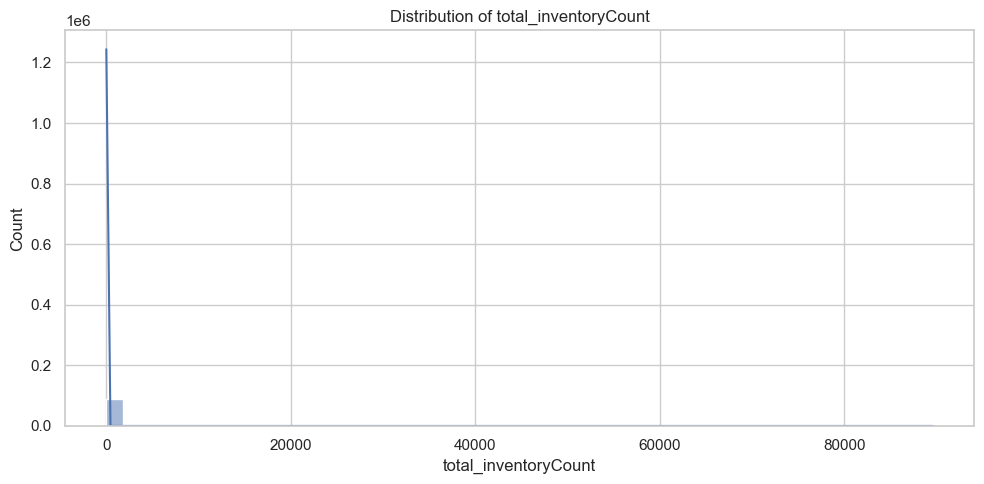

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


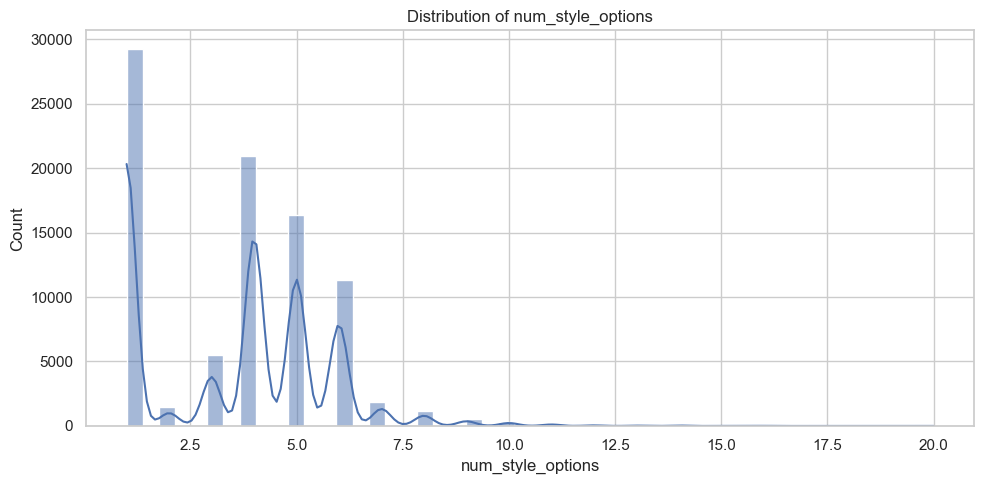

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


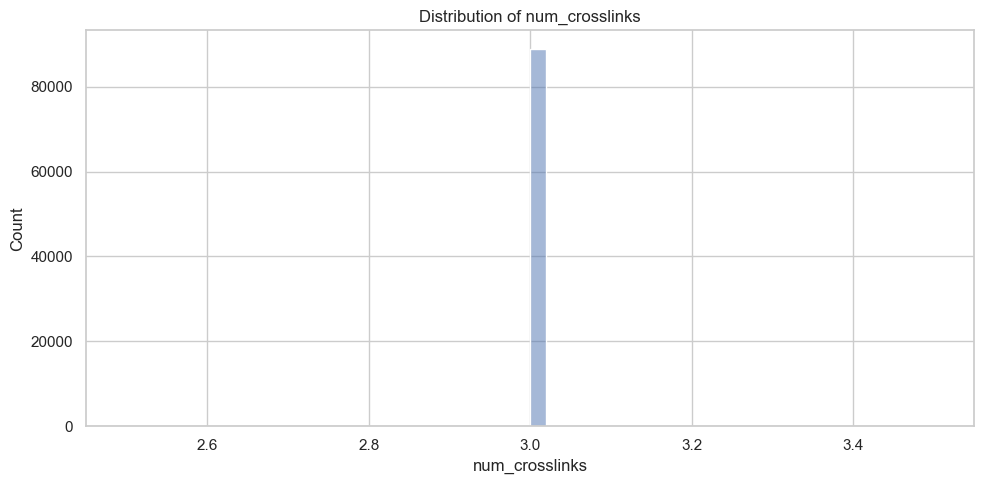

In [10]:
# Histograms for numeric columns
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


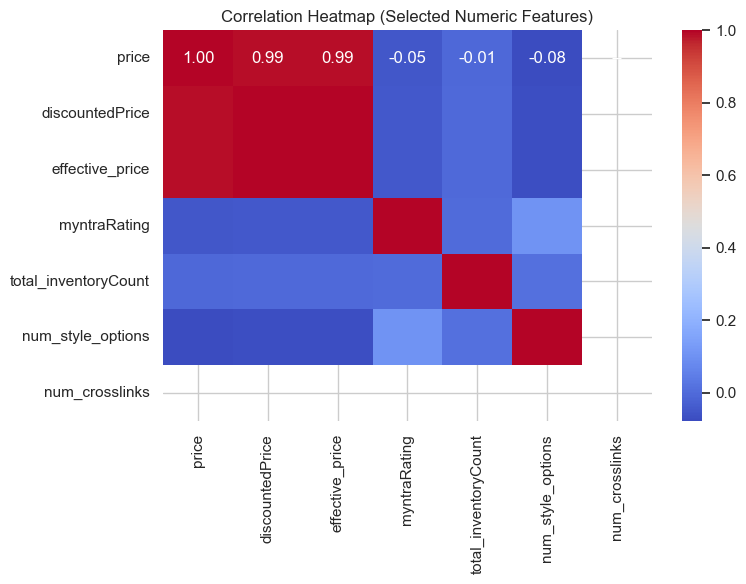

In [11]:
# Check correlation between numeric features
corr = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Selected Numeric Features)")
plt.tight_layout()
plt.show()

### 4.1 Price vs Discounted Price vs Effective Price

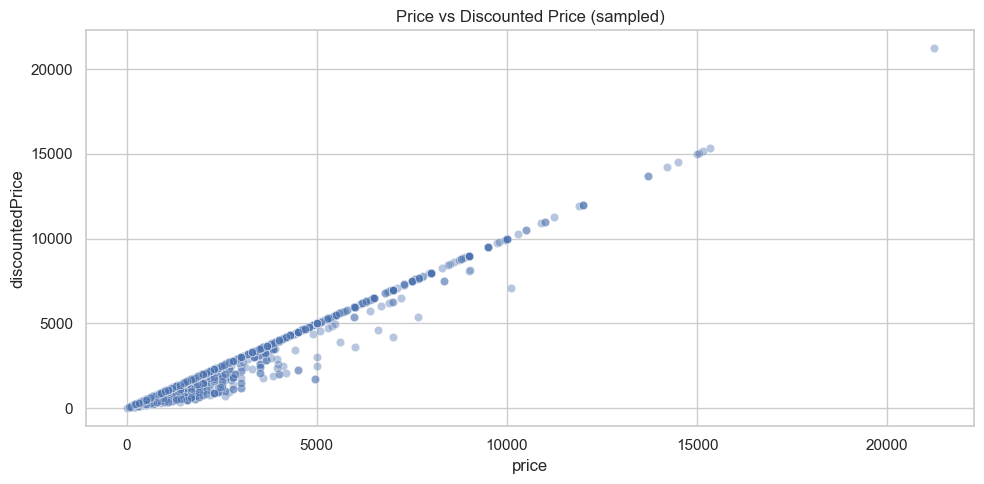

In [12]:
# Scatter: price vs discountedPrice
if "price" in df.columns and "discountedPrice" in df.columns:
    plt.figure()
    sns.scatterplot(
        data=df.sample(min(5000, len(df)), random_state=42),
        x="price",
        y="discountedPrice",
        alpha=0.4
    )
    plt.title("Price vs Discounted Price (sampled)")
    plt.tight_layout()
    plt.show()

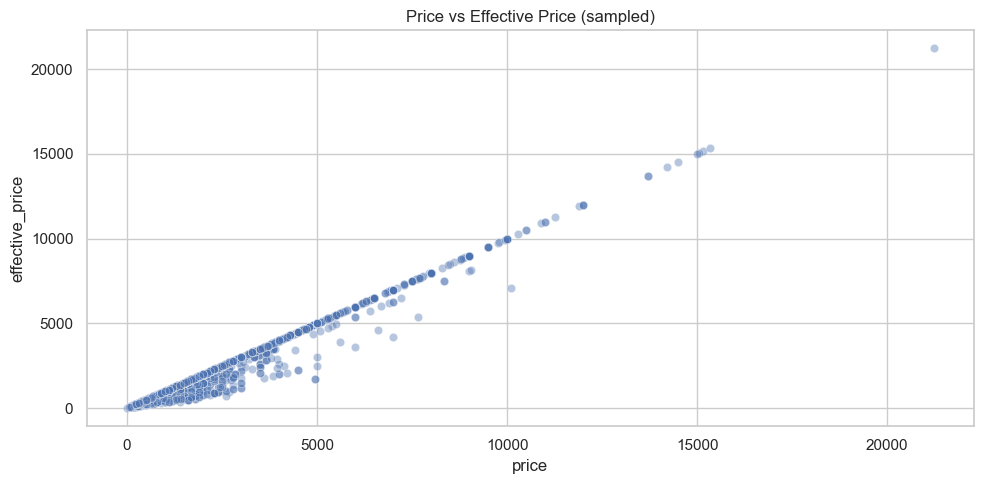

In [13]:
# Scatter: price vs effective_price (if present)
if "price" in df.columns and "effective_price" in df.columns:
    plt.figure()
    sns.scatterplot(
        data=df.sample(min(5000, len(df)), random_state=42),
        x="price",
        y="effective_price",
        alpha=0.4
    )
    plt.title("Price vs Effective Price (sampled)")
    plt.tight_layout()
    plt.show()

## 5. Categorical Feature Exploration

In [14]:
# We'll look at:
# - gender
# - masterCategory
# - subCategory
# - articleType
# - baseColour
# - season
# - usage
cat_cols = [
    "gender",
    "masterCategory",
    "subCategory",
    "articleType",
    "baseColour",
    "season",
    "usage",
]

cat_cols = [c for c in cat_cols if c in df.columns]
print("Categorical columns used for EDA:", cat_cols)

Categorical columns used for EDA: ['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'usage']


In [15]:
# Frequency tables
for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts(dropna=False).head(20))


Value counts for gender:
gender
Men       44330
Women     37264
Unisex     4328
Boys       1660
Girls      1310
Name: count, dtype: int64

Value counts for masterCategory:
masterCategory
Apparel           42800
Accessories       22578
Footwear          18444
Personal Care      4808
Free Items          210
Sporting Goods       50
Home                  2
Name: count, dtype: int64

Value counts for subCategory:
subCategory
Topwear                     30810
Shoes                       14688
Bags                         6110
Bottomwear                   5388
Watches                      5084
Innerwear                    3616
Jewellery                    2160
Eyewear                      2146
Fragrance                    2024
Sandal                       1926
Wallets                      1866
Flip Flops                   1830
Belts                        1622
Socks                        1396
Lips                         1054
Dress                         956
Loungewear and Nightwear      9

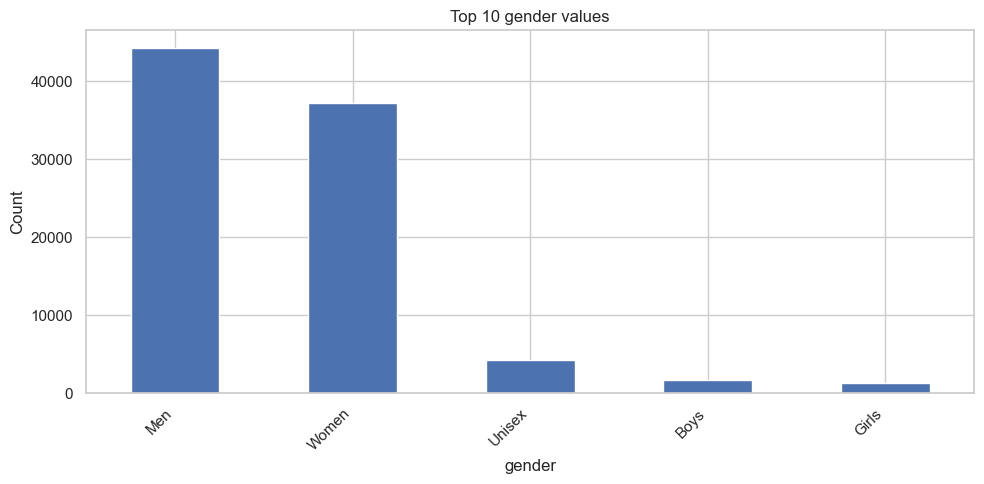

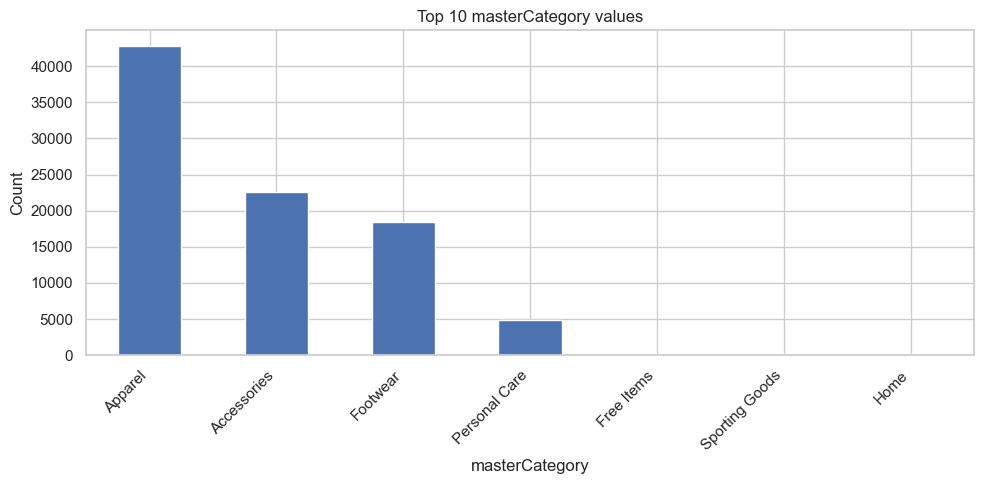

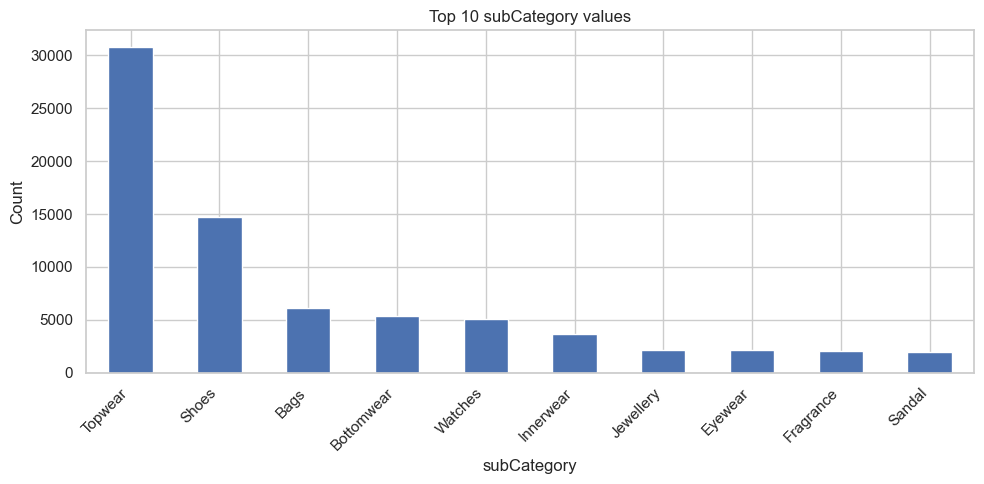

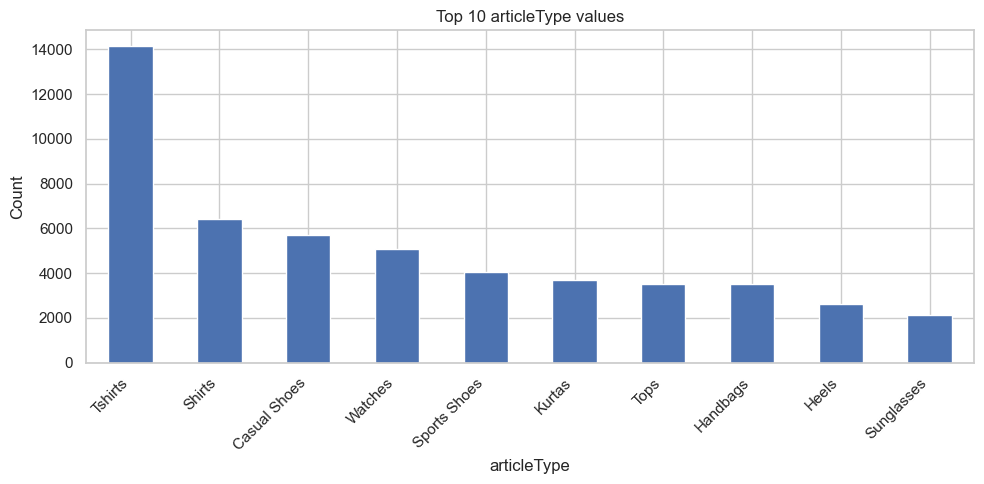

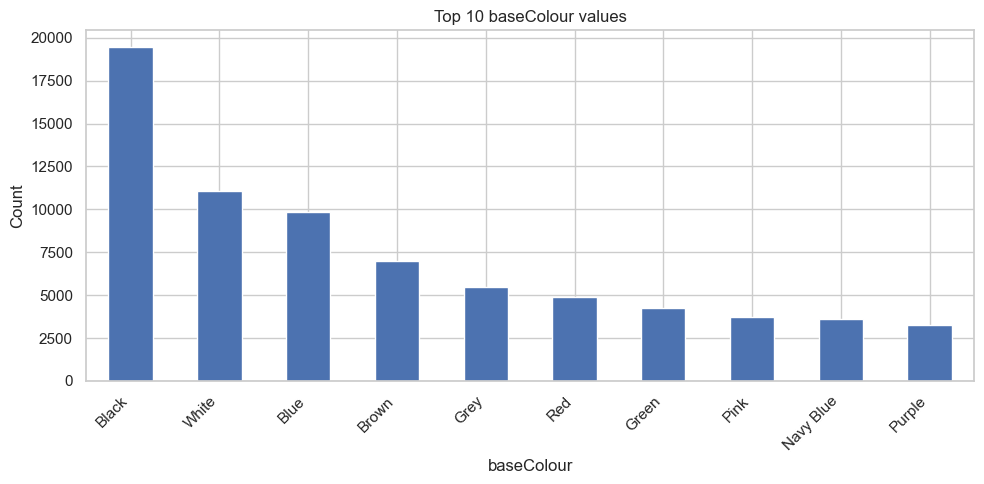

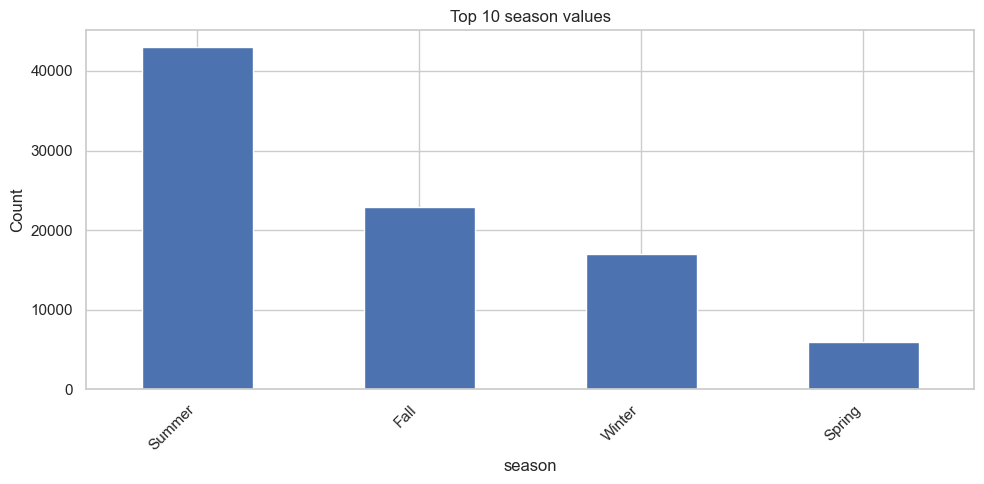

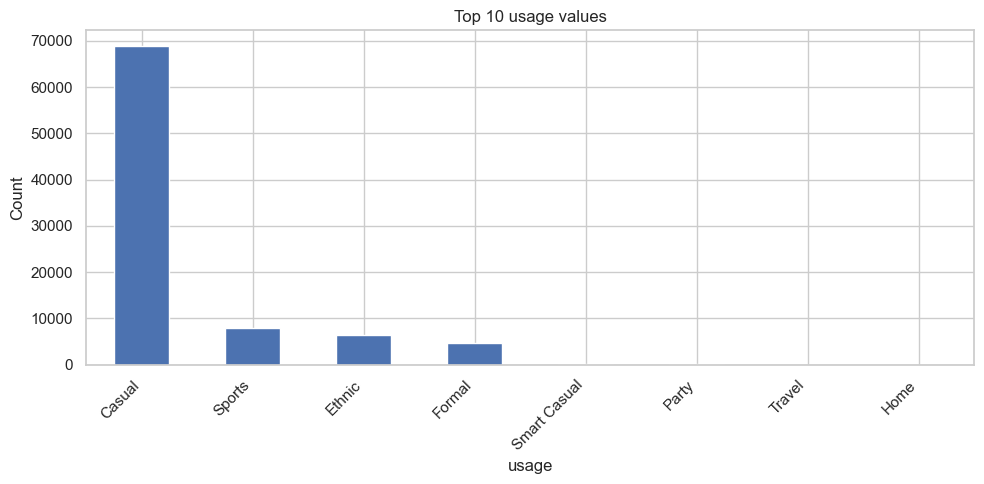

In [16]:
# Bar plots for top categories
def plot_top_categories(column, top_n=10):
    if column not in df.columns:
        return
    plt.figure()
    df[column].value_counts().head(top_n).plot(kind="bar")
    plt.title(f"Top {top_n} {column} values")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

for col in ["gender", "masterCategory", "subCategory", "articleType", "baseColour", "season", "usage"]:
    if col in df.columns:
        plot_top_categories(col)

## 6. Price & Discount by Category / Gender / Season

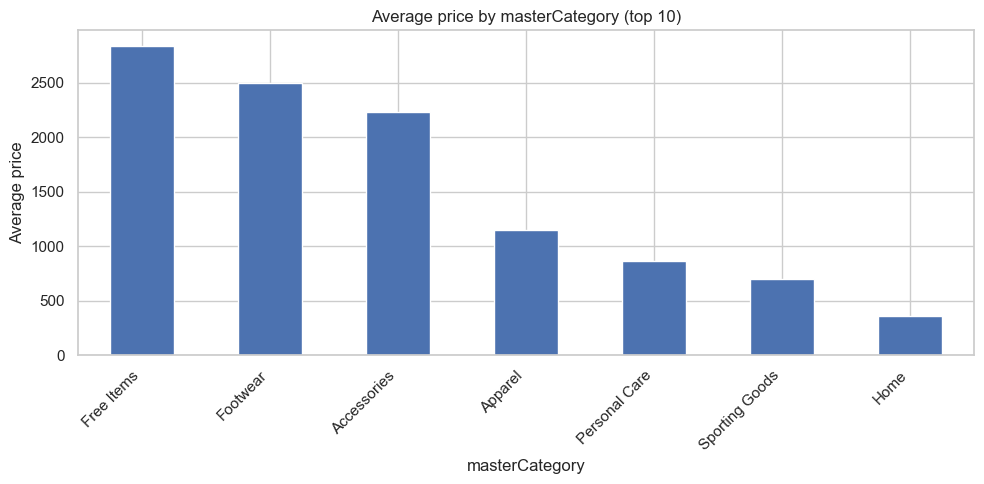

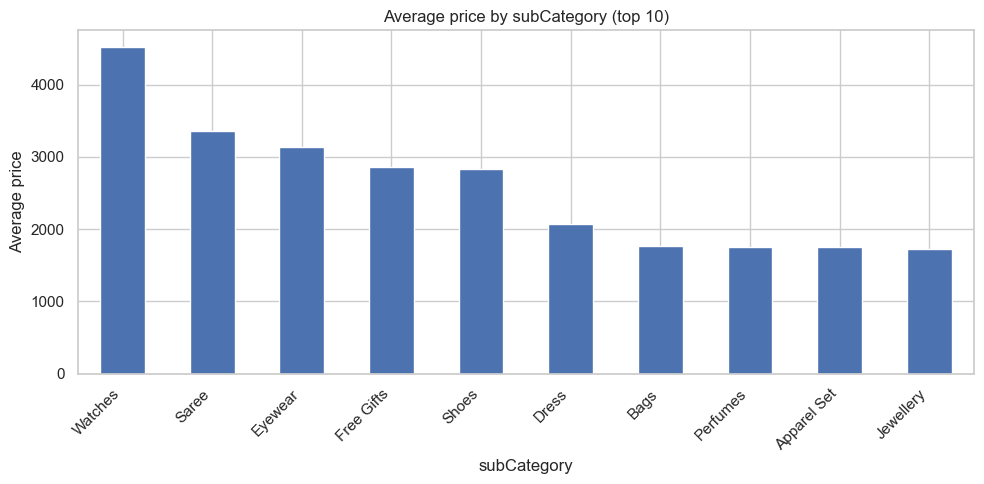

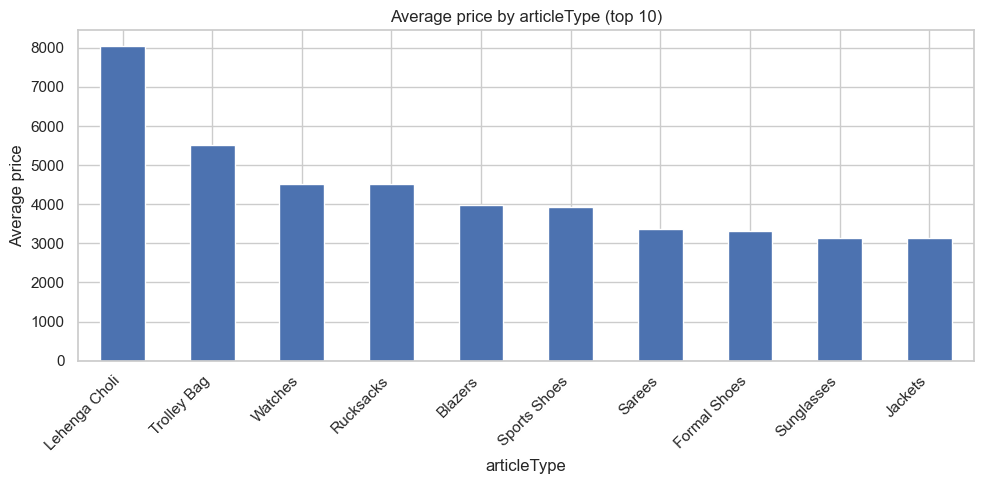

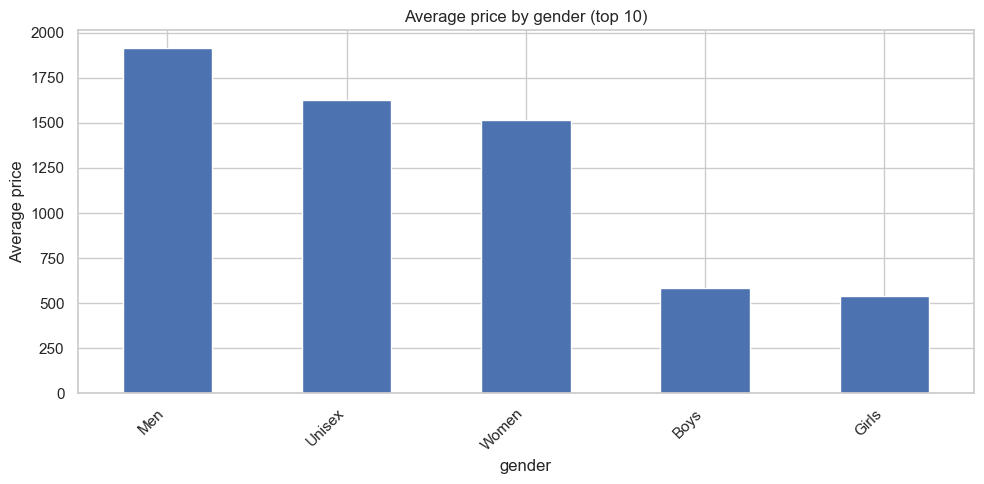

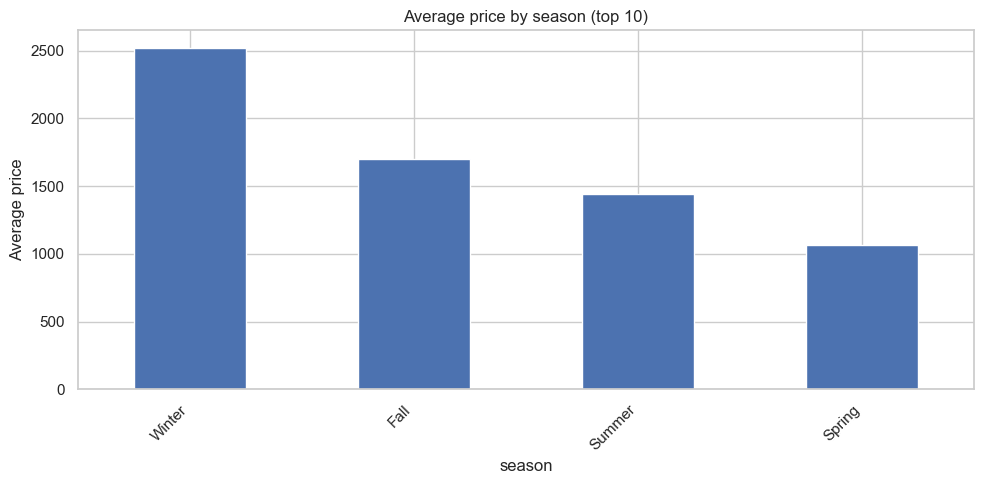

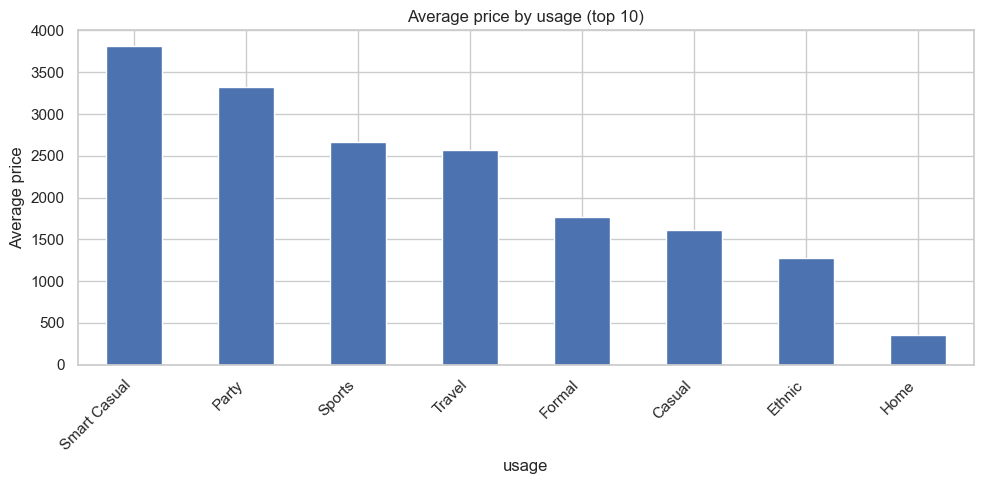

In [17]:
# Helper function to plot average price (or other numeric) by a categorical column
def plot_numeric_by_category(cat_col, num_col="price", top_n=10):
    if cat_col not in df.columns or num_col not in df.columns:
        return
    
    grouped = (
        df.groupby(cat_col)[num_col]
        .mean()
        .sort_values(ascending=False)
        .head(top_n)
    )
    
    plt.figure()
    grouped.plot(kind="bar")
    plt.title(f"Average {num_col} by {cat_col} (top {top_n})")
    plt.xlabel(cat_col)
    plt.ylabel(f"Average {num_col}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

for cat in ["masterCategory", "subCategory", "articleType", "gender", "season", "usage"]:
    plot_numeric_by_category(cat, num_col="price", top_n=10)

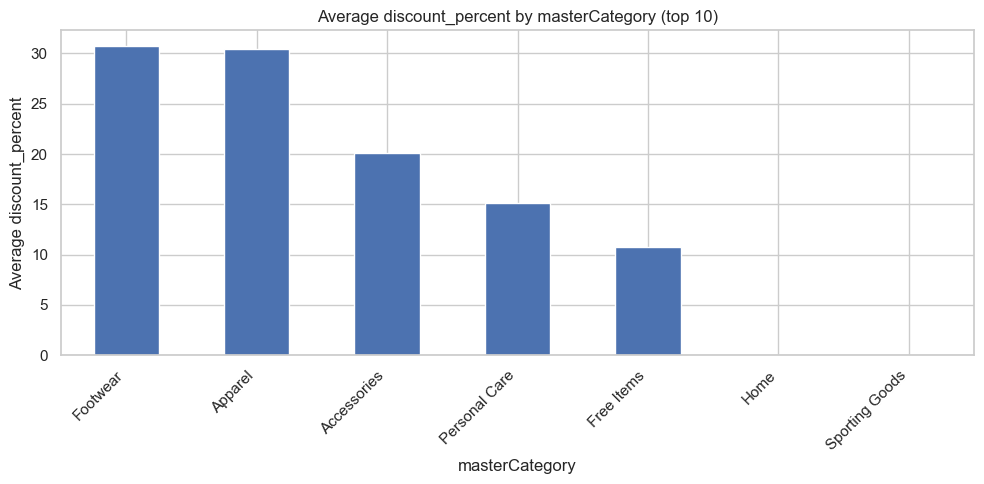

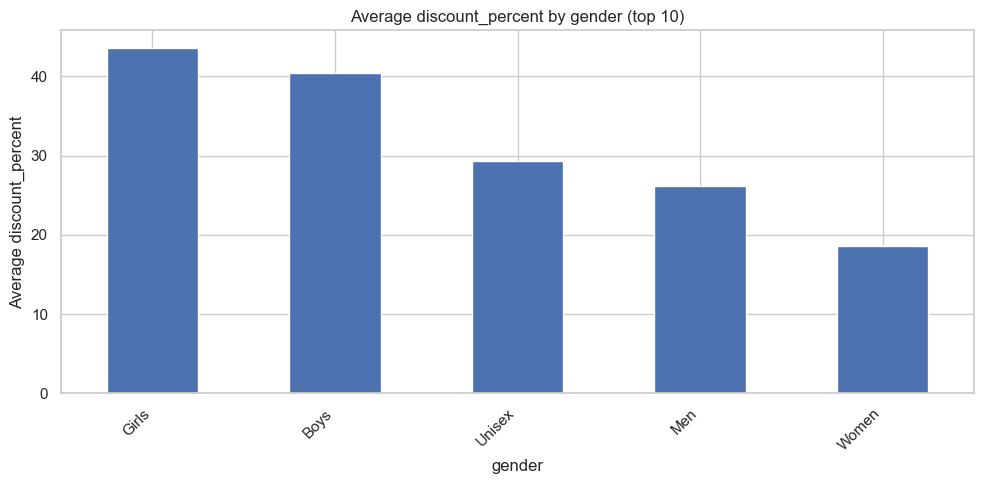

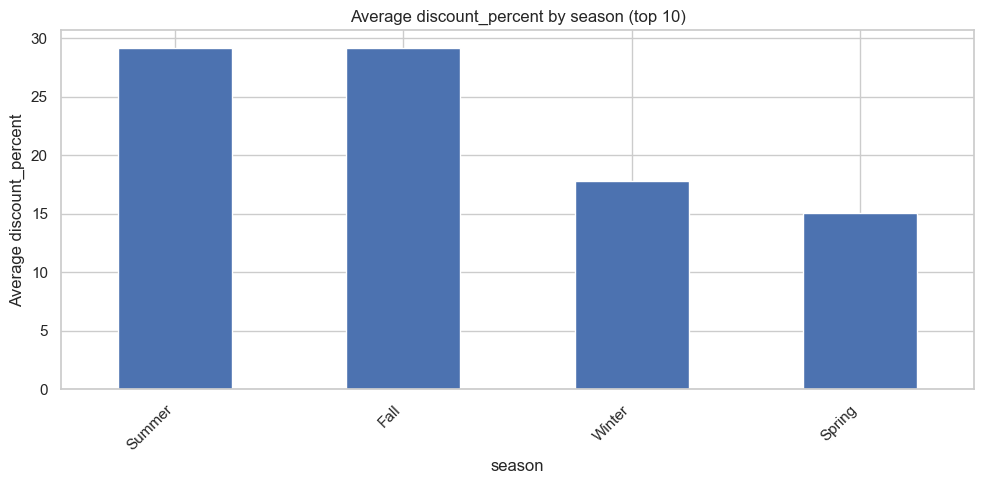

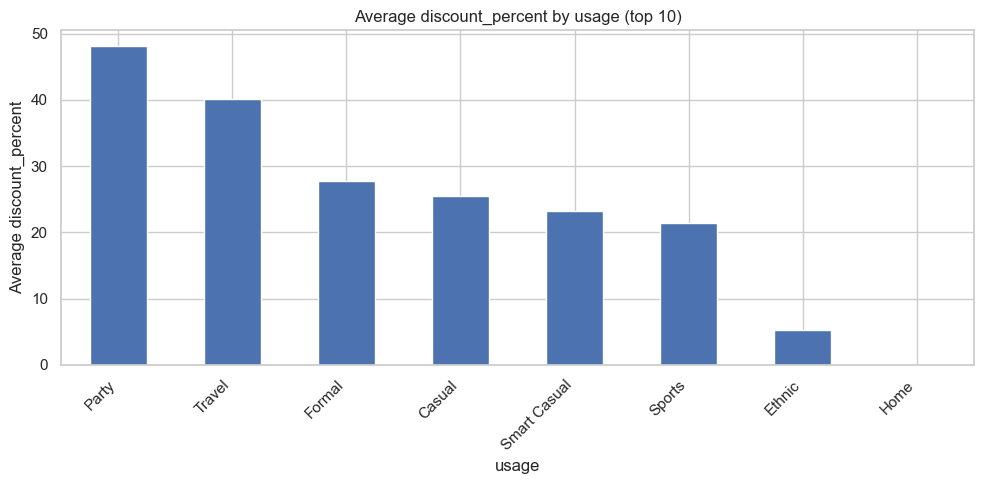

In [18]:
# Average discount percentage (if discount_percent exists) by masterCategory / gender
if "discount_percent" in df.columns:
    for cat in ["masterCategory", "gender", "season", "usage"]:
        plot_numeric_by_category(cat, num_col="discount_percent", top_n=10)

## 7. Time-based Exploration (Catalog Add Date)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


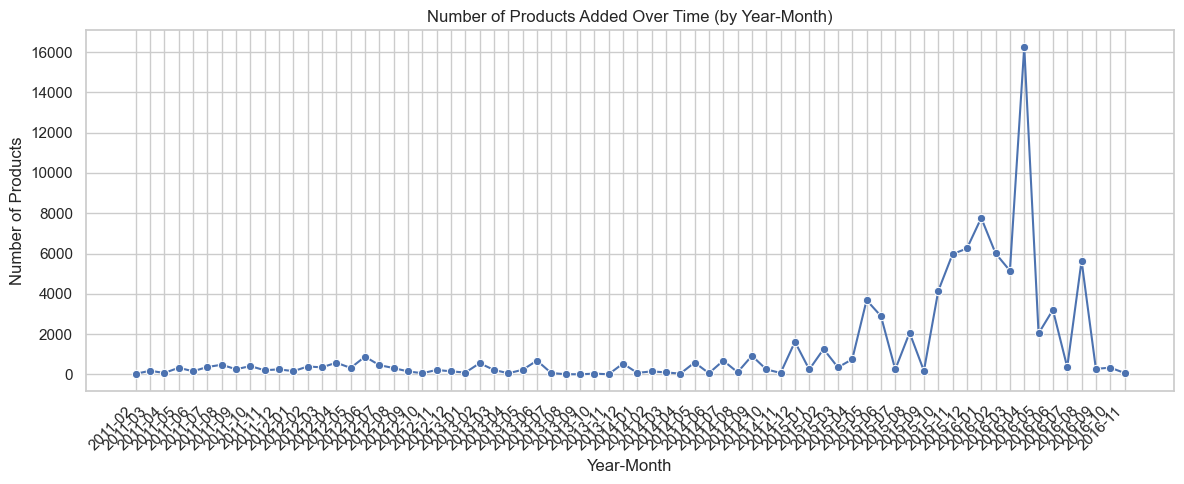

In [19]:
# We'll look at how many products were added over time if `catalogAddDate_utc` exists.
if "catalogAddDate_utc" in df.columns:
    # Convert to datetime if not already
    df["catalogAddDate_utc"] = pd.to_datetime(df["catalogAddDate_utc"], errors="coerce")
    
    # Extract year-month
    df["catalog_year_month"] = df["catalogAddDate_utc"].dt.to_period("M").astype(str)
    
    counts_over_time = (
        df.dropna(subset=["catalog_year_month"])
        .groupby("catalog_year_month")["id"]
        .count()
        .reset_index()
        .rename(columns={"id": "num_products"})
    )
    
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=counts_over_time, x="catalog_year_month", y="num_products", marker="o")
    plt.xticks(rotation=45, ha="right")
    plt.title("Number of Products Added Over Time (by Year-Month)")
    plt.xlabel("Year-Month")
    plt.ylabel("Number of Products")
    plt.tight_layout()
    plt.show()
    
    counts_over_time.head()

## 8. Quick Text Feature Peek (Product Display Name)

In [20]:
# Just a small, high-level check of the text field.
if "productDisplayName" in df.columns:
    print("Example productDisplayName values:")
    display(df["productDisplayName"].sample(10, random_state=42))

# %%
if "description_text" in df.columns:
    print("Example description_text values:")
    display(df["description_text"].dropna().sample(10, random_state=42))

Example productDisplayName values:


52595             Redtape Men Stone Wall Blue Casual Shoes
86045                Nike Men's Backboard White Black Shoe
6091            U.S. Polo Assn. Men Solid Navy Blue Jacket
60185                         Idee Men Metallic Sunglasses
37054    Revlon ColorStay Overtime Faithful Fawn Lip Co...
59216                     Mother Earth Women Magenta Kurta
61848              Nike Unisex Ultimatum Max Blue Backpack
278             Esprit Women Cool Chic White Steel Watches
30829                      Myntra Women Pack of 3 T-shirts
8751     United Colors of Benetton Men White Printed T-...
Name: productDisplayName, dtype: object

Example description_text values:


6655     This buckaroo men Meztli Brown Casual shoe is ...
11631    This comfy checked scarf from lino perros in b...
15496    Style Note   Revel in the comfort of soft fabr...
44077    Composition  White round neck t-shirt made of ...
67857    Black and red backpack with multiple branding ...
22678    Style Note   Three times the fun with this pac...
710      Grey polo neck t-shirt made of 100% cotton, wi...
74930    Style Note  york perfumes are known for its so...
46506    Wash care    Machine wash separately in cold w...
4178     Composition  Black sweatshirt made of 95% cott...
Name: description_text, dtype: object